<a href="https://colab.research.google.com/github/miguelsimoes2003/aaaaaaaaaaaaaaaaaa/blob/main/Assignment_1_24_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avanced Automation - Assignment 1

To be delivered until 2024-12-06 23:59:59.

**Submission Notes**:
- You should use Google Colab for the assignment.
- After running the entire notebook (including graphs and outputs), save the notebook as a .pdf file, by going to File - Print - Destination: Save as PDF.
- Create a .zip file containing both the .ipynb file (the notebook itself) and the .pdf and submit it in Fénix.

## Section 1 -- Linear Regression

**1.** Consider a dataset with 100 observations, containing a single predictor and a quantitative response. Two different models are fitted to the data, a linear regression ($m_1: Y = \beta_0 + \beta_1 X + \epsilon$) and a cubic regression ($m_2: Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon$).

**1.a)** Suppose that the actual relation between X and Y is linear. Can the **training** residual sum of squares (RSS) of the linear model be expected to be smaller, larger or equal to the one from the cubic model? Or is there no information to tell? Justify your answer.

The training RSS of the cubic model will be smaller than that of the linear model. This is beacuse the cubic model has more parameters and is more flexible, allowing it to fit the data more closely.

**1.2** Answer question 1.a) considering the test RSS rather than the training RSS.

Considering the test RSS, the linear model is expected to peform better than the cubic model. The cubic model will have a higher test RSS due to overfitting.

**1.3** Suppose that the actual relationship between X and Y is not linear, but it is not known how far it is from being linear. What is it expected of the the **training** RSS for the linear compared with the cubic models? Or is there not enough information? Justify your answer.

The training RSS for the cubic model is expected to be equal to or smaller than that of the linear model. This is because the cubic model is more flexible (has more parameters) and capable of fitting the data as well as the linear model on the training set.

**1.4** Answer question 1.c) considering the test RSS rather than the training RSS.

There is not enough information to say whether the test RSS will be smaller or larger than the cubic model. It is necessary to know the extent of the non-linearity.

**2.** Consider now a dataset of measurements of physical measurements of crabs in the Boston area.

The dataset has the following variables:
- `sex` - Sex of the crab, either male (M), female (F) or indeterminate (I).
- `length` - Length of the crab (in feet)
- `diameter` - Diameter of the crab (in feet)
- `height` - Height of the crab (in feet)
- `weight` - Weight of the crab (in ounces)
- `shucked_weight` - Weight without the shell (in ounces)
- `viscera_weight` - Weight of internal organs (in ounces)
- `shell_weight` - Weight of the shell (in ounces)
- `age` - Age of the crab (in months)

**2.1** Load the dataset `crab_data.csv`.

In [12]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split

df = pd.read_csv("crab_data.csv")
df.head()


,sex,length,diameter,height,weight,shucked_weight,viscera_weight,shell_weight,age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


**2.2** Check if the dataset has missing values. If so, discard any row that has a missing value.

In [13]:
df_clean = df.dropna()

**2.3** How many crabs of indeterminate sex are older than 15 months?

In [14]:
crab_data = df_clean.copy()
crab_data.head()

filter = (crab_data["sex"] == "I") & (crab_data["age"] > 15)

quantity = df[filter].shape[0]

print(f"The number of crabs with indeterminate sex (I) and older than 15 months: {quantity}")


The number of crabs with indeterminate sex (I) and older than 15 months: 21


**2.4** Plot a correlation matrix of the numerical columns (with a statistical significance of 0.1%).

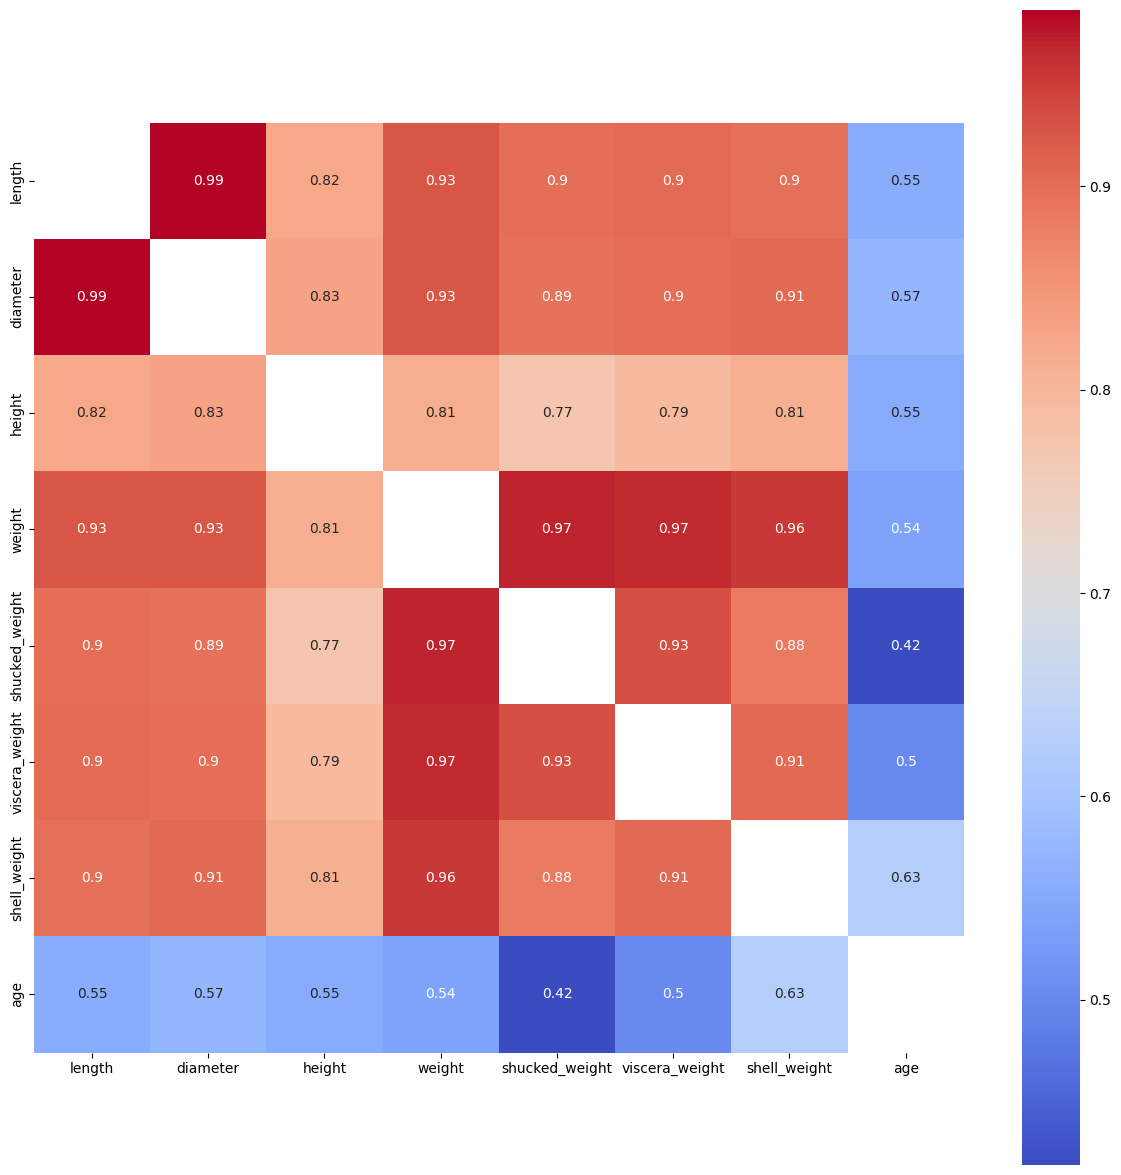

In [17]:
from scipy.stats import pearsonr

## Remove Sex column
crab_data_2 = crab_data.drop(columns=["sex"])

## Calculate the correlations between the columns
crab_data_2_corrs = crab_data_2.corr(method='pearson')

## Calculate the p-value, as the second element of the response from the pearsonr function.
pval = crab_data_2.corr(method=lambda x, y: pearsonr(x, y)[1])

## Establish the mask, to hide values without a given statistical significance
ptg_stat_sig = 0.1/100
mask = pval > ptg_stat_sig

## Plot the correlation matrix using seaborn's heatmap function
plt.subplots(figsize=(15, 15))
heatmap = sns.heatmap(crab_data_2_corrs, mask=mask, square = True, cmap = 'coolwarm', annot = True)
#heat= sns.heatmap(pval, square = True, cmap = 'coolwarm', annot = True)

**2.5** Split the data into test and training datasets.
Consider a test dataset comprised of 30% of the whole dataset.

In [10]:
crab_data_3 = crab_data_2.copy()

# Separate characteristics (X) e label (y)
X = crab_data_3.drop(columns=["age"])  # characteristics
y = crab_data_3["age"]  # label

# Split the data in train (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verificar os tamanhos dos conjuntos
print("Train set - Characteristics:", X_train.shape)
print("Train set - label:", y_train.shape)
print("Test set - Characteristics:", X_test.shape)
print("Test set - label:", y_test.shape)


Train set - Characteristics: (2725, 7)
Train set - label: (2725,)
Test set - Characteristics: (1168, 7)
Test set - label: (1168,)


**2.6** Perform a simple linear regression to predict the `age` with a single predictor.
Explain why you chose the predictor.

Print the obtained model and the $R^2$ on the train and test datasets.


age = 7.7773 + 0.2168 * shucked_weight
R^2: 0.1746


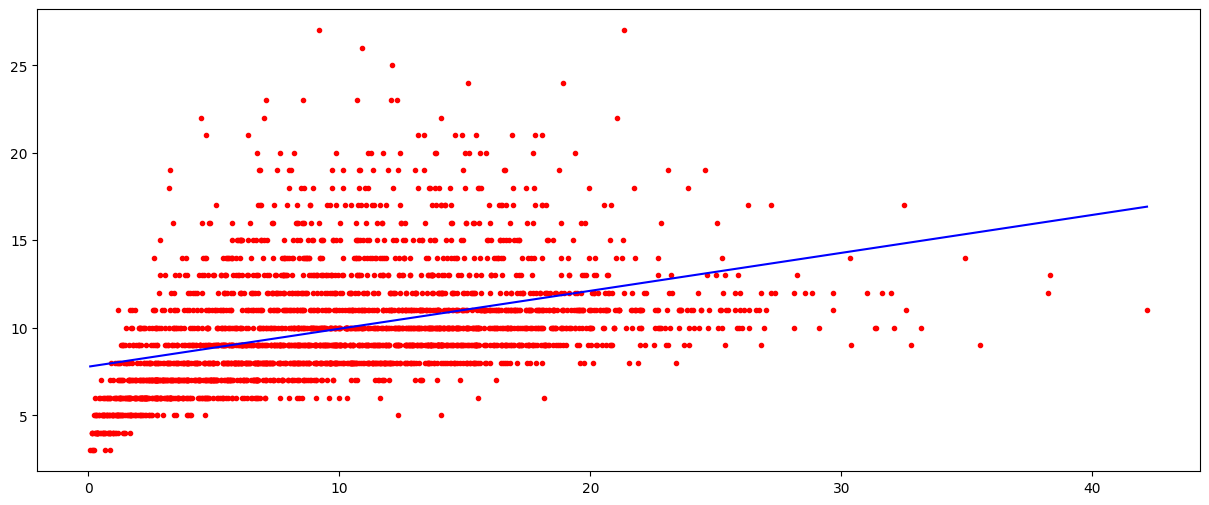

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Assign the predictor and response to variables. To fit the data, the pandas dataframe must be converted into a numpy
## array in a matricial shape, even if with a single column
X = X_train['shucked_weight'].values.reshape(-1, 1)
y = y_train.values.reshape(-1, 1)

## Initialize the model as a LinearRegression() function, and fit the data to it
regr = LinearRegression()
regr.fit(X, y)

## Print the interception and coefficient
print('age = {:.4f} + {:.4f} * shucked_weight'.format(regr.intercept_[0], regr.coef_[0][0]))

## To calculate the R^2 score, the prediction of medv is calculate using the predict method.
age_pred = regr.predict(X)
r2_value = r2_score(y, age_pred)
print('R^2: {:.4f}'.format(r2_value))

regr.coef_
## Determine limits (min/max) of lstat and calculate the corresponding value of medv. Important: this can be done between
## only two points because this is a linear regression.
limits_shucked_weight = np.array([min(X), max(X)])
age_vals = regr.intercept_[0] + regr.coef_[0][0]*limits_shucked_weight

## Plot the scatterplot and the regression line
plt.rcParams['figure.figsize'] = [15, 6]
plt.plot(X_train['shucked_weight'], y_train.values, '.r')
plt.plot(limits_shucked_weight, age_vals, 'b-')
plt.show()


**2.7** Plot a scatter plot of the response and predictor, along with the regression line.
Distinguish between the points in the train and test datasets.

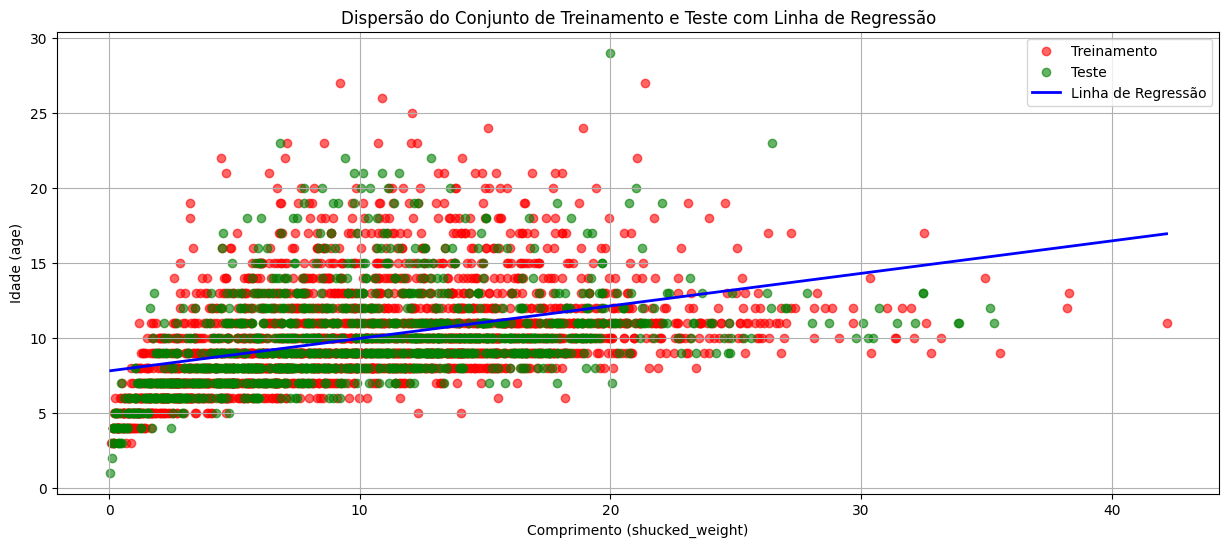

In [20]:
import numpy as np
import matplotlib.pyplot as plt

## Assign the predictor and response to variables. To fit the data, the pandas dataframe must be converted into a numpy
## array in a matricial shape, even if with a single column
X_test_values = X_test['shucked_weight'].values.reshape(-1, 1)
y_test_values = y_test.values.reshape(-1, 1)

# Make predictions on the test set
y_test_pred = regr.predict(X_test_values)

## Determine limits (min/max) of lstat and calculate the corresponding value of medv. Important: this can be done between
## only two points because this is a linear regression.
limits_shucked_weight = np.array([X.min(), X.max()])
age_vals = regr.intercept_[0] + regr.coef_[0][0] * limits_shucked_weight

## Plot the scatterplot with both sets
plt.figure(figsize=(15, 6))

# Points of training set
plt.scatter(X_train['shucked_weight'], y_train, color='red', label='Treinamento', alpha=0.6)

# Points of test set
plt.scatter(X_test['shucked_weight'], y_test, color='green', label='Teste', alpha=0.6)

# Regression line
plt.plot(limits_shucked_weight, age_vals, color='blue', linewidth=2, label='Linha de Regressão')

# Configuring the plot
plt.title('Dispersão do Conjunto de Treinamento e Teste com Linha de Regressão')
plt.xlabel('Comprimento (shucked_weight)')
plt.ylabel('Idade (age)')
plt.legend()
plt.grid(True)
plt.show()


**2.8** Perform a multiple linear regression considering `age` as the response and using all numerical predictors.
Compare the $R^2$ of the simple linear regression model and the multiple linear regression model.

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Assign the predictor and response to variables. To fit the data, the pandas dataframe must be converted into a numpy
## array in a matricial shape, even if with a single column
X = X_train.values
y = y_train.values.reshape(-1, 1)

## Initialize the model as a LinearRegression() function, and fit the data to it
regr = LinearRegression()
regr.fit(X, y)

## Format and print the interception and coefficients
values = list(regr.coef_[0])
values.insert(0, regr.intercept_[0])
names = list(X_train.columns.values)
names.insert(0,'intrcpt')
s = ['{} :: {:.4f}'.format(names[i].rjust(7), values[i]) for i in range(len(values))]
listToStr = '\n'.join([str(elem) for elem in s])
print(listToStr)

## To calculate the R^2 score, the prediction of medv is calculate using the predict method.
age_pred = regr.predict(X)
r2_value = r2_score(y, age_pred)
print('\n{} :: {:.4f}'.format('R^2'.rjust(7), r2_value))

intrcpt :: 3.1242
 length :: -1.1279
diameter :: 6.0368
 height :: 4.0718
 weight :: 0.2470
shucked_weight :: -0.6478
viscera_weight :: -0.2558
shell_weight :: 0.4141

    R^2 :: 0.5242


**2.9** Perform a multiple  linear regression considering `age` as the response and using all predictors. Comment on the $R^2$ of this model.

In [22]:
# Copy of a variable
crab_data_4 = df_clean.copy()

# Identify non-numeric columns
non_numeric_columns = crab_data_4.select_dtypes(include=['object', 'category']).columns

# Separation of 'sex' and consequent atribution of zeros and ones
crab_data_4 = pd.get_dummies(crab_data, columns=non_numeric_columns, drop_first=True)
crab_data_4[['sex_I', 'sex_M']] = crab_data_4[['sex_I', 'sex_M']].astype(int)

# Separate features (X) and labels (y)
X = crab_data_4.drop(columns=["age"])  # Features
y = crab_data_4["age"]  # Labels

# Dividing training data (70%) and test data (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Assign the predictor and response to variables. To fit the data, the pandas dataframe must be converted into a numpy
## array in a matricial shape, even if with a single column
X = X_train.values
y = y_train.values.reshape(-1, 1)

## Initialize the model as a LinearRegression() function, and fit the data to it
regr = LinearRegression()
regr.fit(X, y)

## Format and print the interception and coefficients
values = list(regr.coef_[0])
values.insert(0, regr.intercept_[0])
names = list(X_train.columns.values)
names.insert(0,'intrcpt')
s = ['{} :: {:.4f}'.format(names[i].rjust(7), values[i]) for i in range(len(values))]
listToStr = '\n'.join([str(elem) for elem in s])
print(listToStr)

## To calculate the R^2 score, the prediction of medv is calculate using the predict method.
age_pred = regr.predict(X)
r2_value = r2_score(y, age_pred)
print('\n{} :: {:.4f}'.format('R^2'.rjust(7), r2_value))

intrcpt :: 4.1017
 length :: -0.6978
diameter :: 5.0713
 height :: 3.6966
 weight :: 0.2392
shucked_weight :: -0.6317
viscera_weight :: -0.2881
shell_weight :: 0.4187
  sex_I :: -0.8811
  sex_M :: 0.0248

    R^2 :: 0.5352


## Section 2 -- Classification

**3.** Suppose that a dataset is divided into two equally-sized training and test sets, and then try out two different classification procedures:

* The first is the logistic regression, obtaining an error rate of 20% on the training data and 30% on the test data.
* The second is a 1-nearest neighbors, with an average error rate (averaged over test and training datasets) of 18%.

Based on these results, which method is preferred for classifying new observations? Why?

The 1-nearest neighbors method is preferred for classifying new observations because it has a lower error rate compared to the logistic regression's test error rate. The second procedure generalizes the data better making it suitable for unseen data.


**4.** Consider again the crab dataset.
The objective now is to predict the `sex` of the crab.

**4.1** Disregard the records that have an indeterminate sex.
Split the data into test and training datasets.
Consider a test dataset comprised of 30% of the whole dataset.

In [ ]:
# Create a boolean mask
df = df.dropna()
df_filtered = df['sex'] != 'I'

# Subset the main dataset using the boolean mask
df_cleaned = df[df_filtered]  # Rows where 'sex' is not 'I'

# Split the cleaned dataset into training (70%) and testing (30%)
df_train, df_test = train_test_split(df_cleaned, test_size=0.3, random_state=42)

# Ensure the subsets are independent of the original dataset
df_train = df_train.copy()
df_test = df_test.copy()

print(f"Total rows: {len(df)}")
print(f"Filtered rows: {len(df_cleaned)}")
print(f"Training rows: {len(df_train)}")
print(f"Test rows: {len(df_test)}")

Total rows: 3893
Filtered rows: 2660
Training rows: 1862
Test rows: 798


**4.2** Train a Logistic Regression model and report the accuracy and confusion matrix for the test set.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## Create input and output matrices
features = ['length', 'diameter','height', 'weight','shucked_weight','viscera_weight','shell_weight', 'age']
X_train = df_train[features].values
y_train = df_train['sex'].values
X_test = df_test[features].values
y_test = df_test['sex'].values

## Create the model and fit the data to it
model = LogisticRegression()
model.fit(X_train, y_train)

## Print the coefficients and the interception value
print('Intercept: {}'.format(model.intercept_))
print('Coefficients: {}'.format(model.coef_))
print('Classes: {}'.format(model.classes_))

## Predict the classification and print the confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print ('\n' + 'Actual'.rjust(25))
print ('{} |  {}'.format('F'.rjust(21),'M'))
print ('{}:  {}  |  {}'.format('Predicted F'.rjust(14), cm[0,0], cm[1,0]))
print ('{}:  {}  |  {}'.format('Predicted M'.rjust(14), cm[0,1], cm[1,1]))
print('\nSuccess Rate: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))

## Store the necessary variables
cols_to_store = [i for i in range(len(model.classes_)) if model.classes_[i] == 'M']
y_logistic_pred = model.predict_proba(X_test)[:,cols_to_store]
y_logistic_true = (y_test.copy() == 'M').copy()

Intercept: [2.01864879]
Coefficients: [[-0.50241089 -0.92982393 -0.88341359  0.00909543  0.06609412 -0.08626448
  -0.0173712  -0.01254329]]
Classes: ['F' 'M']

                   Actual
                    F |  M
   Predicted F:  107  |  82
   Predicted M:  269  |  340

Success Rate: 56.02%


**4.3** Train a Linear Discriminant Analysis (LDA) model and report the accuracy and confusion matrix for the test set.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## Create input and output matrices
features = ['length', 'diameter','height', 'weight','shucked_weight','viscera_weight','shell_weight', 'age']
X_train = df_train[features].values
y_train = df_train['sex'].values
X_test = df_test[features].values
y_test = df_test['sex'].values

## Create the model and fit the data to it
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

## Print the coefficients and the interception value
print('Intercept: {}'.format(model.intercept_))
print('Coefficients: {}'.format(model.coef_))
print('Priors: {}'.format(model.priors_))
print('Means: {}'.format(model.means_))
print('Classes: {}'.format(model.classes_))

## Predict the classification and print the confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print ('\n' + 'Actual'.rjust(25))
print ('{} |  {}'.format('F'.rjust(20),'M'))
print ('{}:  {}  |  {}'.format('Predicted F'.rjust(14), cm[0,0], cm[1,0]))
print ('{}:  {}  |  {}'.format('Predicted M'.rjust(14), cm[0,1], cm[1,1]))
print('\nSuccess Rate: {:.2f}%'.format(accuracy_score(y_pred, y_test)*100))

## Store the necessary variables
cols_to_store = [i for i in range(len(model.classes_)) if model.classes_[i] == 'M']
y_LDA_pred = model.predict_proba(X_test)[:,cols_to_store]
y_LDA_true = (y_test.copy() == 'M').copy()

Intercept: [2.10422675]
Coefficients: [[ 0.28338967 -2.02969369 -1.15201779  0.00897189  0.06852797 -0.08565645
  -0.00925601 -0.00986075]]
Priors: [0.45596133 0.54403867]
Means: [[ 1.4501914   1.13959069  0.39648115 29.9865918  12.76535578  6.58768584
   8.66108947 11.17550059]
 [ 1.40740375  1.10144373  0.37822063 28.17139909 12.23707707  6.12451348
   8.02465761 10.70779862]]
Classes: ['F' 'M']

                   Actual
                   F |  M
   Predicted F:  112  |  85
   Predicted M:  264  |  337

Success Rate: 56.27%


**4.4** Train a Nearest Neighbors model. Describe and implement an approach to choose the number of neighbors. Report the accuracy and confusion matrix for the test set.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
## Create input and output matrices
features = ['length', 'diameter','height', 'weight','shucked_weight','viscera_weight','shell_weight', 'age']
X_train = df_train[features].values
y_train = df_train['sex'].values
X_test = df_test[features].values
y_test = df_test['sex'].values

def KNN_fit(X_train, X_test, y_train, y_test, n_neighbors, verbosity=0):

    ## Create the model and fit the data to it
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)

    ## Predict the classification and print the c1onfusion matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracy_val = accuracy_score(y_pred, y_test)*100

    if verbosity == 1:
        print ('\n' + 'Actual'.rjust(25))
        print ('{} |  {}'.format('F'.rjust(20),'M'))
        print ('{}:  {}  |  {}'.format('Predicted F'.rjust(14), cm[0,0], cm[1,0]))
        print ('{}:  {}  |  {}'.format('Predicted M'.rjust(14), cm[0,1], cm[1,1]))
        print('\nSuccess Rate: {:.2f}%'.format(accuracy_val))

    return model, accuracy_val


# Function to find the best number of neighbors using cross-validation
def find_best_k(X_train, y_train, max_k=20):
    k_values = list(range(1, max_k + 1))
    cv_scores = []

    # Evaluate each k using cross-validation
    for k in k_values:
        model = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
        cv_scores.append(scores.mean())

    # Find the k with the highest cross-validation accuracy
    best_k = k_values[np.argmax(cv_scores)]
    best_score = max(cv_scores)

    return best_k, best_score, cv_scores

# Find the best k
best_k, best_score, cv_scores = find_best_k(X_train, y_train)
print(f"Best number of neighbors: {best_k}")
print(f"Cross-validated accuracy for best k: {best_score:.2f}")
## Store the necessary variables
model, accuracy_val = KNN_fit(X_train, X_test, y_train, y_test, n_neighbors=best_k, verbosity=1)
cols_to_store = [i for i in range(len(model.classes_)) if model.classes_[i] == 'M']
y_KNN_pred = model.predict_proba(X_test)[:,cols_to_store]
y_KNN_true = (y_test.copy() == 'M').copy()

Best number of neighbors: 3
Cross-validated accuracy for best k: 0.53

                   Actual
                   F |  M
   Predicted F:  0  |  339
   Predicted M:  0  |  0

Success Rate: 0.00%


**4.5** Plot the ROC curve and calculate the area under curve (AUC) for each model you trained. Comment on the results.

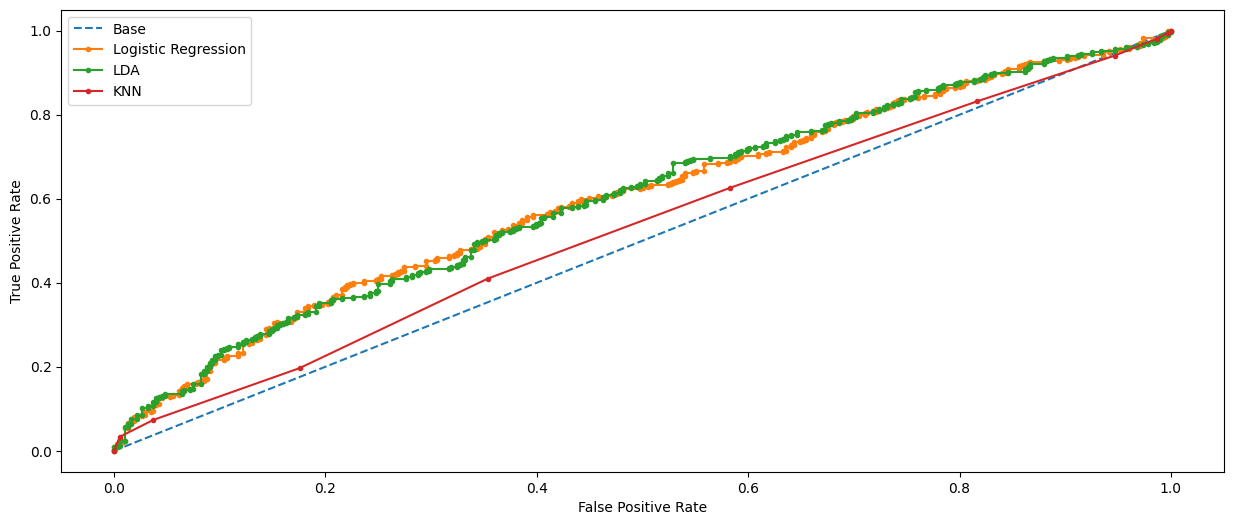

                      AUC
Logistic Regression: 0.602
                LDA: 0.602
                KNN: 0.530


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Calculate ROC curves
lr_fpr, lr_tpr, _ = roc_curve(y_logistic_true, y_logistic_pred)
lr_fpr1, lr_tpr1, _ = roc_curve(y_LDA_true, y_LDA_pred)
lr_fpr4, lr_tpr4, _ = roc_curve(y_KNN_true, y_KNN_pred)

# Plot the ROC curve for the model
plt.subplots(figsize=(15, 6))
plt.plot([0,1], [0,1], linestyle='--', label = 'Base')
plt.plot(lr_fpr, lr_tpr, marker='.', label = 'Logistic Regression')
plt.plot(lr_fpr1, lr_tpr1, marker='.', label = 'LDA')
plt.plot(lr_fpr4, lr_tpr4, marker='.', label = 'KNN')

# Axis Labels
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Print scores of Area under curve (AUC)
print('AUC'.rjust(25))
print('{}: {:.3f}'.format('Logistic Regression'.rjust(19), roc_auc_score(y_logistic_true, y_logistic_pred)))
print('{}: {:.3f}'.format('LDA'.rjust(19), roc_auc_score(y_LDA_true, y_LDA_pred)))
print('{}: {:.3f}'.format('KNN'.rjust(19), roc_auc_score(y_KNN_true, y_KNN_pred)))

**4.6** A considerable part of the crab records in the dataset do not have a determined sex.
How can you build a model that makes a prediction of the sex for these records?
Describe every step of your approach.

Initially we saw up to what age there was sex = 'I' and filtered the training data for the models for data in which sex is 'M' or 'F' and that the age is younger than the age of the crab with sex='I' being older. Then we create three models based on the training data: a logistic regression model, a linear discriminant analysis model, and a nearest neighbors model. To predict the sex, we input the data from the crabs with sex = 'I' in the models, and we got the prediction of each crab.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Create a boolean mask
df = df.dropna()
df_filtered = (df['sex'] != 'I') & (df['age'] < 21)
# Subset the main dataset using the boolean mask
df_cleaned = df[df_filtered]  # Rows where 'sex' is not 'I'

# Ensure the subsets are independent of the original dataset
df_train = df_cleaned.copy()

df_I = df[df['sex'] == 'I']
df_test = df_I.copy()


## Create input and output matrices
features = ['length', 'diameter','height', 'weight','shucked_weight','viscera_weight','shell_weight', 'age']
X_train = df_train[features].values
y_train = df_train['sex'].values
X_test = df_test[features].values

## Create the model and fit the data to it
model_1 = LogisticRegression()
model_1.fit(X_train, y_train)
model_2 = LinearDiscriminantAnalysis()
model_2.fit(X_train, y_train)
best_k, best_score, cv_scores = find_best_k(X_train, y_train)
model_3 = KNeighborsClassifier(n_neighbors=best_k)
model_3.fit(X_train, y_train)
print(f"Best number of neighbors: {best_k}")
print(f"Cross-validated accuracy for best k: {best_score:.2f}")
## Predict the classification and print the confusion matrix
y_pred_r = model_1.predict(X_test)
y_pred_lda = model_2.predict(X_test)
y_KNN_pred = model_3.predict(X_test)
# Show the predictions for each record
df_test['predicted_sex_r'] = y_pred_r
df_test['predicted_sex_lda'] = y_pred_lda
df_test['predicted_sex_knn'] = y_KNN_pred

# Display the counts for each predicted class (F and M)
print(df_test['predicted_sex_r'].value_counts())
print(df_test['predicted_sex_lda'].value_counts())
print(df_test['predicted_sex_knn'].value_counts())




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best number of neighbors: 3
Cross-validated accuracy for best k: 0.54
predicted_sex_r
M    1159
F      74
Name: count, dtype: int64
predicted_sex_lda
M    1154
F      79
Name: count, dtype: int64
predicted_sex_knn
M    894
F    339
Name: count, dtype: int64


## Section 3 -- Bootstrap and k-Fold

**5.1** Explain how k-fold cross-validation is implemented.

Data is randomly divided into k equal sized parts. A part k is left out and the model is fit to the other k-1 parts (combined) and then predictions can be obtained for the left out kth part. This is done in turn for each part k=1,2,...,k and then the results are combined.

**5.2** What are the advantages and disadvantages of k-Fold cross-validation relative to:

1. Validation set approach.
2. Leave One Out Cross-Validation (LOOCV).

Advantages:
The k-Fold cross validation uses the entire dataset for training and validation. The validation set approach separates data into training and testing, part of the data is not used for training.
k-Fold averages over larger test sets in each fold compared to LOOCV's single point, leading to more stable and less variable performance metrics.
Disadvantages:
k-Fold requires the model to be trained k times, making it more computationally expensive than a single validation set approach.
LOOCV uses every data point for training except one, making it a better
estimate for small datasets

## Section 4 -- Other Questions

**6.** In your group's option, what are the advantages and disadvantages of using a virtual environment when programming in Python?

Advantages: Each project can have its own isolated python environment with specific external libraries, packages or modules required to run the project, avoiding conflicts between projects. Everyone in the group can work on the project indepedently. Prepares us for real world collaborative development

Disadvantages: Consumes more disk space, as each virtual environment duplicates Python binaries and installed libraries. Having to activate/deactivate the environment, which can be a very annoying process. Complicates collaboration, as team members need to recreate the same environmet on their respective systems, which can be very challenging, especially due to lack of communication.

**7.** In your group's opinion, in what circumstances is it better to use Jupyter Notebooks and when is it better to use Google Colab notebooks? Give some specific examples.

It is better to use Jupyter Notebooks when working alone and it doesn't require internet connection. An example of when Jupyter Notebook is better than Google Colab is, for example, when someone is analyzing large data stored on local servers.

On the other, Google Colab is better when there is work to be done in collaboration with other people. It also allows the users to use GPU/TPU that are more potent than what they have. An example of when Google Colab is better than Jupyter Notebook is, for example, when a small group of students want to train a deep learning model using Colab's free GPU/TPU resouces.

**8.** Enter your GitHub repository webpage.